# Notebook3 Jafuno Douba

## Exercice 1

## Exercice 2
### Question 1

In [1]:
dataKS <- read.csv("dataKS.csv", row.names=1)
head(dataKS)

X
0.3724259
0.3060578
2.0918769
0.6831117
0.9095124
3.1422800


### Question 2

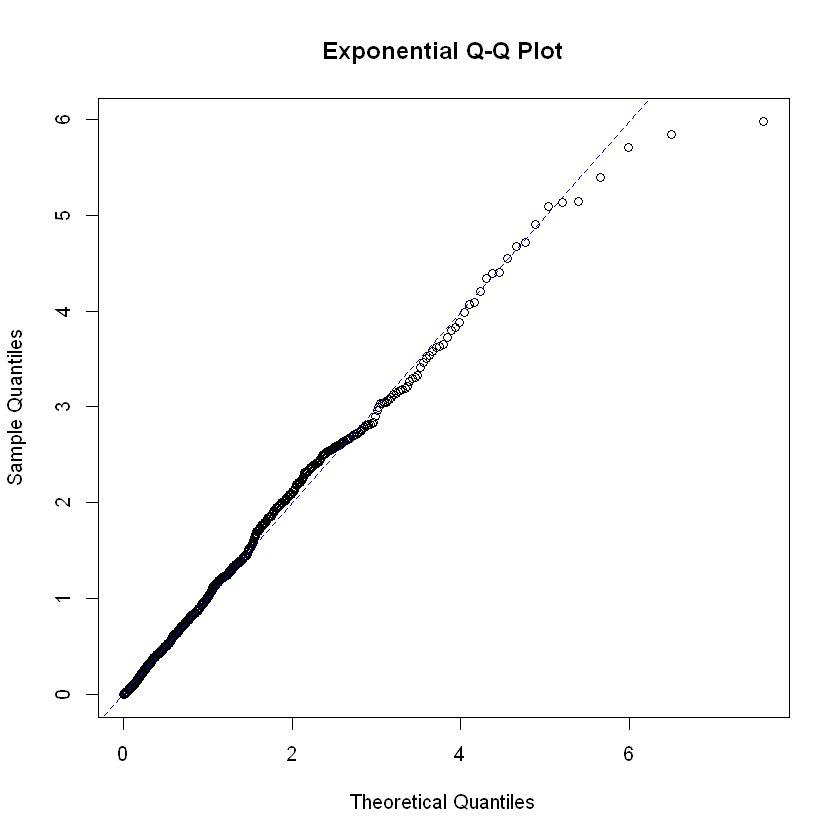

In [2]:
p <- ppoints(length(dataKS$X)) # donne des points equi-répartis sur (0,1)  
q <- quantile(dataKS$X,p=p) # quantiles empiriques du jeu de données
qqplot(qexp(p) ,q, main="Exponential Q-Q Plot",
     xlab="Theoretical Quantiles",ylab="Sample Quantiles")
qqline(q, distribution=qexp,col="blue", lty=2)

La loi exponentielle semble être une loi raisonnable pour le vecteur dataKS.

### Question 3
On commence par calculer la valeur de la statistique de test à l'aide de notre fonction **KStest**

In [3]:
source('KStest.R')
KStest(x = dataKS$X, FUN = pexp)

ks.test(x=dataKS$X, 'pexp')

[1] 0.02429215


	One-sample Kolmogorov-Smirnov test

data:  dataKS$X
D = 0.024292, p-value = 0.5967
alternative hypothesis: two-sided


On retrouve bien la même valeur pour la statistique de test avec les deux fonctions.

### Question 4

Dans la sortie précédente, la p-value étant égale à 0.5967. On ne peut pas rejeter l'hypothèse selon laquelle le jeu de données dataKS suit une loi exponentielle de paramètre 1. 

## Exercice 3

### Question 1
Afin de tester l'indépendance entre l'opinion et l'activité, on propose un test d'indépendance du Khi-Deux dont la statistique de test est donnée par 

$$
D^2(Z) = \sum_{i=1}^k \sum_{j=1}^\ell \frac{\left(\tfrac{N_{i,\bullet} N_{\bullet,j}}{n} - N_{i,j}\right)^2}{\tfrac{N_{i,\bullet}N_{\bullet,j}}{n}}
$$

### Question 2

| Très satisfait | Assez satisfait | Déçu
---|------------|----------|----
Chômeurs| 35|10|5
Actifs | 90 | 210|50
Retraités|70|23|7

In [4]:
tab <- matrix(c(35, 10, 5, 90, 210, 50, 70, 23, 7), ncol = 3, byrow = T)
rownames(tab) <- c("Chomeurs", "Actifs", "Retraites")
colnames(tab) <- c("Tres satisfait", "Assez satisfait", "Decu")
tab

,Tres satisfait,Assez satisfait,Decu
Chomeurs,35,10,5
Actifs,90,210,50
Retraites,70,23,7


In [5]:
tab1 <- matrix(rep(apply(tab, 1, sum), 3), ncol = 3)
tab2 <- matrix(rep(apply(tab, 2, sum), 3), ncol = 3, byrow = T)
tab1
tab2

50,50,50
350,350,350
100,100,100


195,243,62
195,243,62
195,243,62


In [6]:
n <- sum(tab)
tab3 <- tab1*tab2/n

T <- sum((tab - tab3)^2/tab3)

alpha <- 0.05
q <- qchisq(1 - alpha, df = 4)

T < q

[1] FALSE

La statistique de test n'étant pas plus petite que le quantile d'ordre 0.95 de la loi de $\chi^2$ à 4 degrés de liberté, on rejette l'hypothèse d'indépendance. 
### Question 3

In [7]:
chisq.test(tab)


	Pearson's Chi-squared test

data:  tab
X-squared = 87.649, df = 4, p-value < 2.2e-16


Nous retrouvons le résultat obtenu à la question précédente. 

## Exercice 4

|Blond|Roux|Châtain|Brun|Noir de jais
----|----|----|-------|----|---
Garçon | 592|119|849|504|36
Fille|544|97|677|451|14

### Question 1

In [8]:
tab <- matrix(c(592, 119, 849, 504, 36, 544, 97, 677, 451, 14), ncol = 5, byrow = T)
rownames(tab) <- c("Garcon", "Fille")
colnames(tab) <- c("Blond", "Roux", "Chatain", "Brun", "Noir")
tab

,Blond,Roux,Chatain,Brun,Noir
Garcon,592,119,849,504,36
Fille,544,97,677,451,14


In [9]:
tab <- addmargins(tab)
tab

,Blond,Roux,Chatain,Brun,Noir,Sum
Garcon,592,119,849,504,36,2100
Fille,544,97,677,451,14,1783
Sum,1136,216,1526,955,50,3883


### Question 2

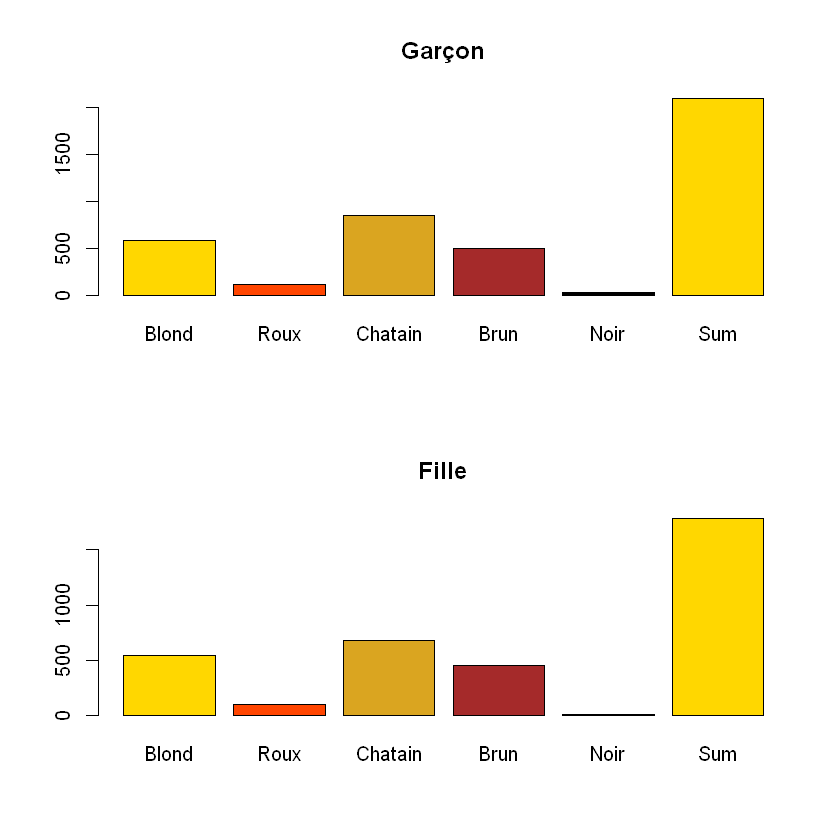

In [10]:
par(mfrow=c(2,1))
couleur <- c("Gold","OrangeRed","Goldenrod","Brown","Black") 
barplot(tab[1,],main="Garçon", col=couleur)
barplot(tab[2,],main="Fille", col=couleur)

### Question 3

In [11]:
chisq.test(tab)


	Pearson's Chi-squared test

data:  tab
X-squared = 10.467, df = 10, p-value = 0.4005


La p-valeur étant égale à 0.03, nous rejettons l'hypothèse d'indépendance aux niveaux 5% et 10% mais pas au niveau 1%.

## Exercice 5

### Question 1

Tester, chez les individus blonds, si la proportion de 
garçons est égale à 50 % Nous utilisons la fonction **binom.test** en lui donnant comme arguments le nombre de garçons (x=592), la taille de l’échantillon (n=1136), la proportion testée (p=0.5) et choisissons l’hypothèse alternative H1 selon laquelle la proportion de garçons est différente de 50%.

In [12]:
binom.test(x=592,n=1136,p=0.5,alternative="two.sided")


	Exact binomial test

data:  592 and 1136
number of successes = 592, number of trials = 1136, p-value = 0.1631
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.4916142 0.5505297
sample estimates:
probability of success 
             0.5211268 


La p-valeur étant égale 0.1631, nous conservons donc l'hypothèse selon laquelle la proportion de garçons est égale à 50%. 

### Question 2

Tester l’égalité des proportions de filles pour les différentes couleurs de cheveux Ce test peut se faire grâce à la fonction **prop.test**. Lors de son appel, il suffit de fournir une liste avec le nombre de filles pour chaque catégorie puis une liste avec le nombre total d’individus par catégorie :

In [13]:
prop.test(c(544,97,677,451,14),n=c(1136,216,1526,955,50))


	5-sample test for equality of proportions without continuity
	correction

data:  c(544, 97, 677, 451, 14) out of c(1136, 216, 1526, 955, 50)
X-squared = 10.467, df = 4, p-value = 0.03325
alternative hypothesis: two.sided
sample estimates:
   prop 1    prop 2    prop 3    prop 4    prop 5 
0.4788732 0.4490741 0.4436435 0.4722513 0.2800000 


La p-valeur étant égale à 0.03325, nous rejetons l'hypothèse de l'égalité de la répartition des filles parmi les 5 catégories aux niveaux 1% et 5% mais pas au niveau 10%. 